# Benchmarking and Profiling

In [26]:
class Particle:
    def __init__(self, x, y, ang_speed):
        self.x = x
        self.y = y
        self.ang_speed = ang_speed

# Algorithm

* Calculate the direction of motion v_x, v_y
* Calculate the displacement (d_x, d_y) which is the product of time and speed and follows the direction of motion.
* Repeat steps 1 and 2 for enough time steps to cover the total time

In [27]:
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
    
    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        for i in range(nsteps):
            for p in self.particles:
                # 1. Calculate the direction
                
                norm = (p.x**2 + p.y**2)**0.5
                v_x = (-p.y)/norm
                v_y = p.x/norm
                
                # 2. Calculate the displacement
                
                d_x = timestep * p.ang_speed * v_x
                d_y = timestep * p.ang_speed * v_y
                
                p.x += d_x
                p.y += d_y
                
                # 3. Repeat for all the time steps
                
                continue

In [36]:
from matplotlib import pyplot as plt
from matplotlib import animation

In [37]:
anim = None
def visualize(simulator):
    global anim
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]
    
    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')
    
    # Axis limits
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)


    # It will be run when the animation starts
    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        # We let the particle evolve for 0.1 time units
        simulator.evolve(0.01)

        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]

        line.set_data(X, Y)
        return line,

    anim = animation.FuncAnimation(fig, 
                                   animate,
                                   init_func=init,
                                   blit=True,
                                   interval=10)
    plt.show()

In [38]:
def test_visualize():
    particles = [
        Particle(0.3, 0.5, +1),
        Particle(0.0, -0.5, -1),
        Particle(-0.1, -0.4, +3),
    ]
    
    simulator = ParticleSimulator(particles)
    visualize(simulator)

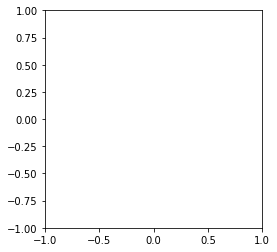

In [39]:
test_visualize()